# Pre-processing on the dataset about Covid-19 Misinformation on Twitter

The dataset had some issues, so after the hydratation, we've found some tweets which weren't about Covid-19.

We've removed the following tweets:


tweet_ID | year
---|-----
1027222566581231617 | 2018 
1179751464215949313 | 2019 
539901552937664513 | 2014 
539914412401123328 | 2014
1025660196218183680 | 2018 
1088739576687091712 | 2019 
1088800362847526913 | 2019 
1101094162865242113 | 2019 
1156661710247403523 | 2019
1169318930156007425 | 2019
1171793133690150919 | 2019
1185034497521340416 | 2019
1201776606706118656 | 2019
900683060915523584 | 2017
1015698605720686593 | 2018
1126068077999853568 | 2019
1165696327558344704 | 2019
1181970325757517825 | 2019
1184483676924436480 | 2019
1188412233270714368 | 2019
1200150134203568128 | 2019
725937576532578304 | 2016
900685413416751104 | 2017
1132002388376788995 | 2019
1134145939151740929 | 2019
1167029938635100161 | 2019
720102224605638656 | 2016
903686853508857859 | 2017
962814691415347200 | 2018
995638432318738432 | 2018
1014931242842775558 | 2018
1023850585949274112 | 2018
1023860881929711616 | 2018
1053169444690763776 | 2018
1105241563620360193 | 2019
1117789925527773184 | 2019
1153706403565117440 | 2019
1153708733882601472 | 2019
673699231098527744 | 2015
827283890146463750 | 2017
940623615615266822 | 2017
971254280601694209 | 2018
1105214769563402241 | 2019
1105393223462207488 | 2019
1105668048416108544 | 2019
1172772374074118145 | 2019
1172789409478922241 | 2019
1176858065242660865 | 2019
1209402080273809408 | 2019
481020774195552256 | 2014
899910766064750592 | 2017
1097754735656951808 | 2019
1105282184414416898 | 2019
1150852667301912578 | 2019
1068140903917858816 | 2018
1184254666315456512 | 2019
587827070077571072 | 2015
1018297937720414208 | 2018
1043078112010031104 | 2018
957147456596213760 | 2018
999352051829297153 | 2018
1052255689563721729 | 2018
1068212767897858049 | 2018
1068277017999826944 | 2018
1177110421758795777 | 2019
1197668564137906176 | 2019
1154784135447220224 | 2019
515407029498679298 | 2014
551629973195218946 | 2015
580828044027424768 | 2015
593080368430911488 | 2015
934640524832645120 | 2017
963112422822285312 | 2018
1075785713914929152 | 2018
1186606201259343873 | 2019
615979734988681216 | 2015
719965429175820288 | 2016
933795562947796992 | 2017
934535302642679808 | 2017
997447899465297923 | 2018
1167826809355792390 | 2019
1184857295676674048 | 2019
1206404759575506944 | 2019
563148469796216833 | 2015
951117592843956224 | 2018
1200463040224718848 | 2019
513491003462795264 | 2014
1006592956059484160 | 2018
1078854747086450689 | 2018
1207528337180020736 | 2019
1003387827395186688 | 2018

The dataset has a lot of entries which aren't in English. We have translated them to English (see below). Now we're going to visualize the different languages inside the dataset. The language classification is done by a Twitter ML algorithm.

In [2]:
from collections import Counter
import json
import pandas as pd
import altair as alt
import flag

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

index_lang=0
langs = []
for element in data:
    t=data[index_lang]['lang']
    
    if t == "cs":
        langs.append(flag.flag("cz")+" "+t)
    elif t=="da":
        langs.append(flag.flag("dk")+" "+t)
    elif t == "en":
        langs.append(flag.flag("gb")+" "+flag.flag("us")+" "+t)
    elif t == "fa":
        langs.append(flag.flag("ir")+" "+t)
    elif t == "hi":
        langs.append(flag.flag("in")+" "+t)
    elif t == "iw":
        langs.append(flag.flag("il")+" "+t)
    elif t == "ja":
        langs.append(flag.flag("jp")+" "+t)
    elif t == "ur":
        langs.append(flag.flag("pk")+" "+t)
    elif t == "zh":
        langs.append(flag.flag("cn")+" "+t)
    else:
        langs.append(flag.flag(t)+" "+t)
        
    index_lang=index_lang+1
    
count=Counter(langs)
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'lang', 0:'count'})


domain = [flag.flag('am')+" "+'am',flag.flag('ar')+" "+'ar', flag.flag('bg')+" "+'bg', flag.flag('bn')+" "+'bn',flag.flag('ca')+" "+'ca',flag.flag('cz')+" "+'cs',flag.flag('dk')+" "+'da',flag.flag('it')+" "+'it',flag.flag('ta')+" "+'ta',flag.flag('es')+" "+'es',flag.flag('et')+" "+'et',flag.flag('ir')+" "+'fa',flag.flag('fi')+" "+'fi',flag.flag('fr')+" "+'fr',flag.flag('in')+" "+'hi',flag.flag('in')+" "+'in',flag.flag('sr')+" "+'sr',flag.flag('jp')+" "+'ja',flag.flag('lt')+" "+'lt',flag.flag('mr')+" "+'mr',flag.flag('nl')+" "+'nl',flag.flag('pl')+" "+'pl',flag.flag('pt')+" "+'pt',flag.flag('ru')+" "+'ru',flag.flag("gb")+" "+flag.flag("us")+" "+'en',flag.flag('th')+" "+'th',flag.flag('tl')+" "+'tl',flag.flag('tr')+" "+'tr', flag.flag('pk')+" "+'ur',flag.flag('cn')+" "+'zh',flag.flag('de')+" "+'de',flag.flag('il')+" "+'iw',flag.flag('und')+" "+'und']
#range_ = ['red','green','blue','mediumvioletred','purple','black','salmon','brown','darkgrey','orange','fuchsia','teal','coral','cyan','violet','crimson','lime','slateblue','slategray','darkkhaki','tan','indigo','olive','gold','maroon','darkslategray','indianred','tomato','turquoise','darkgreen','chocolate','plum','peru']
range_ = ['lime', 'crimson', 'lightcoral', 'fuchsia', '#3C1414', 'yellowgreen', 'darkblue', 'darkviolet', 'darkgreen', 'olive', '#49796B', ' #00C000', 'deeppink', 'plum', 'darkkhaki', '#00F0A8', '#44AA99', 'lightseagreen', '#6495ED', 'orangered', 'coral', 'turquoise', 'blue', 'black', '#843F5B', 'tomato', '#B06500', 'cyan', 'chocolate', '#E23D28', '#D55E00', 'sienna', 'gold']
#domain = [flag.flag('ar')+" "+'ar',flag.flag('bg')+" "+'bg',flag.flag('ca')+" "+'ca',flag.flag('cz')+" "+'cs',flag.flag('gb')+" "+'cy',flag.flag('dk')+" "+'da',flag.flag('de')+" "+'de',flag.flag('gr')+" "+'el',flag.flag('gb')+" "+flag.flag('us')+" "+'en',flag.flag('es')+" "+'es',flag.flag('et')+" "+'et',flag.flag('eu')+" "+'eu',flag.flag('ir')+" "+'fa',flag.flag('fi')+" "+'fi',flag.flag('fr')+" "+'fr',flag.flag('in')+" "+'hi',flag.flag('ht')+" "+'ht',flag.flag('hu')+" "+'hu',flag.flag('in')+" "+'in',flag.flag('is')+" "+'is',flag.flag('it')+" "+'it',flag.flag('il')+" "+'iw',flag.flag('jp')+" "+'ja',flag.flag('km')+" "+'km',flag.flag('kn')+" "+'kn',flag.flag('kr')+" "+'ko',flag.flag('lt')+" "+'lt',flag.flag('lv')+" "+'lv',flag.flag('mr')+" "+'mr',flag.flag('my')+" "+'my',flag.flag('ne')+" "+'ne',flag.flag('nl')+" "+'nl',flag.flag('no')+" "+'no',flag.flag('pl')+" "+'pl',flag.flag('pt')+" "+'pt',flag.flag('ro')+" "+'ro',flag.flag('ru')+" "+'ru',flag.flag('sd')+" "+'sd',flag.flag('sl')+" "+'sl',flag.flag('sr')+" "+'sr',flag.flag('sv')+" "+'sv',flag.flag('ta')+" "+'ta',flag.flag('in')+" "+'te',flag.flag('th')+" "+'th',flag.flag('tl')+" "+'tl',flag.flag('tr')+" "+'tr',flag.flag('ua')+" "+'uk',flag.flag('und')+" "+'und',flag.flag('pk')+" "+'ur',flag.flag('vi')+" "+'vi',flag.flag('cn')+" "+'zh']
#range_ = ['darkolivegreen', '#577120', '#985629', '#006090', 'salmon', '#DDE26A', 'mediumvioletred', 'limegreen', '#FF6FFF', '#FF007F', 'darkslategray', 'violet', '#18A8D8', '#18A8D8', 'purple', 'green', '#8A3324', 'indigo',

chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('count:Q',title="Tweet count"),
    y=alt.Y('lang:N',title=None),
    color=alt.Color('lang', scale=alt.Scale(domain=domain, range=range_),  legend=None,title="Languages")
)
#legend=alt.Legend(columns=4, symbolLimit=0)
text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)


(chart + text).properties(title="Languages in the dataset",height=900).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=14,
    labelFontSize=12,
    titlePadding=10
)

alt.LayerChart(...)

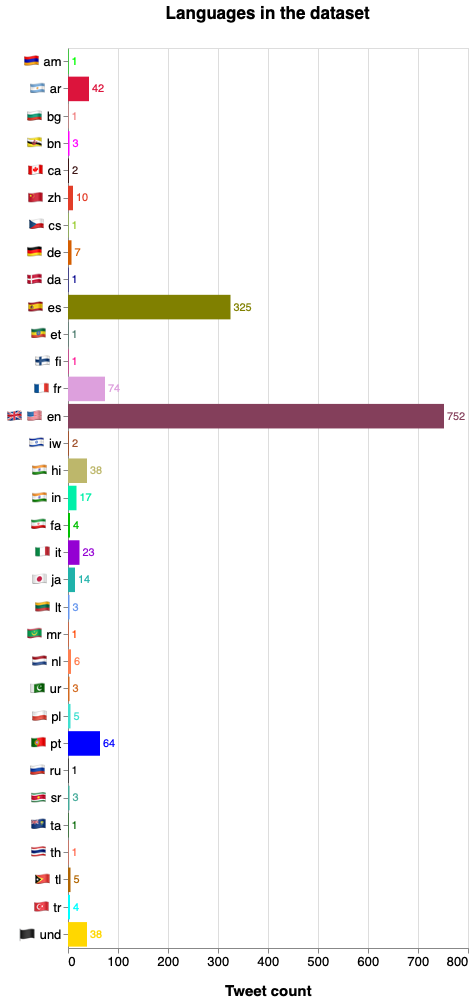

During the hydratation process some Tweet IDs couldn't be found but for classification purposes we needed to have a .csv file matching the IDs inside the .json file, so we've wrote this script to clean again the dataset:

In [2]:
import csv
import pandas as pd
import json
pd.options.mode.chained_assignment = None

csv_dataframe = pd.read_csv('dataset/fakecovid_filtered_dataset_clean_final.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We've filtered the IDs as the dataset contains tweets that are no longer available (about 100):

In [3]:
index_id = 0
id_list = []
for element in data:
    id_list.append(data[index_id]['id_str'])
    index_id=index_id+1

boolean_series = csv_dataframe.tweet_id.isin(id_list)
filtered_df = csv_dataframe[boolean_series]
filtered_df.to_csv('FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=';',index=False)

The .json file produced had multiple languages inside the text fields, we wrote this script to translate the fields which weren't in English ("hashtags" and "full_text") to English.

Everything is done through the Google Translate APIs.

Due to Google Translate Limitations to a massive number of requests, the for loop below does a pre-filtering, based on the lang filed from the .json file. The lang field is filled automatically during the hydratation process, the language classification is done by machine learning algorithms.

The script below is the full version, we've dived the execution in two phases: the first one worked on the "full_text" field, the second one worked on the "hashtag" filed considering that the "full_text" filed was already OK.

In [ ]:
import json
import sys
import string
from google_trans_new import google_translator  
import time

data = []
with open('dataset/fakecovid_result_final.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

f.close()


index=0
translator = google_translator()  
for element in data:
    if data[index]['lang']=="en":
        print(str(index)+" già inglese")
    else:
        translated  = translator.translate(data[index]['full_text'],lang_tgt='en')  
        data[index]['full_text'] = translated
        time.sleep(1) #sleep to avoid being blocked by Google 
        #print(str(index)+" indice" + data[index]['full_text'])
        for entity in data[index]['entities']['hashtags']:
            translated = translator.translate(entity['text'],lang_tgt='en')#lang_tgt è l'alt
            entity['text']=translated
            time.sleep(1)  #sleep to avoid being blocked by Google
            #print(str(index)+" indice" + entity['text'])
    index=index+1


with open('fakecovid_result_final_translated_full.json', 'a') as f_w:
    for line_w in data:
        #print("sto stampando")
        json.dump(line_w, f_w)
        f_w.write('\n')

f.close()

0 già inglese
1 già inglese
2 già inglese
3 già inglese
4 già inglese
5 già inglese
6 già inglese
7 già inglese
8 già inglese
10 già inglese
11 già inglese
12 già inglese
13 già inglese
14 già inglese
15 già inglese
16 già inglese
19 già inglese
21 già inglese
24 già inglese
25 già inglese
26 già inglese
27 già inglese
28 già inglese
29 già inglese
30 già inglese
33 già inglese
35 già inglese
37 già inglese
38 già inglese
40 già inglese
41 già inglese
44 già inglese
46 già inglese
47 già inglese
48 già inglese
49 già inglese
50 già inglese
51 già inglese
52 già inglese
53 già inglese
56 già inglese


## URL pre-processing to create a good visualisation of them

We have to extract the link from the Tweet, so with the BeautifulSoup module, we obtain the title of the page (which is located at the link indicated in the Tweet).

In [ ]:
from collections import Counter
import requests
from bs4 import BeautifulSoup
import datetime
from dateutil.parser import parse
import csv
import itertools
import pandas as pd
import numpy as np
import json
import sys
import string
import re

csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

index=0
urls = []
titles = []
dates = []
category = []
for element in data:
    #print(index)
    if data[index]['entities']['urls'] is not None:
        for entity in data[index]['entities']['urls']:
            if entity['expanded_url'].lower() not in urls:
                token_id = data[index]['id_str']                          
                indice_csv = lista_unica_csv.index(token_id)   
                value_cat =  lista_unica_csv[indice_csv+1].lower()
                if value_cat == "false":
                    value_cat = "fake"
                try:
                    r = requests.get(entity['expanded_url'], timeout=10)
                except requests.exceptions.Timeout:
                    titles.append("[TIMEOUT ERROR]"+"("+entity['expanded_url'].lower()+")")
                    urls.append(entity['expanded_url'].lower())
                    category.append(value_cat.replace(" ", ""))
                    d = parse(data[index]['created_at'])
                    d = d.strftime('%Y/%m/%d')
                    dates.append(d)
                except requests.ConnectionError:
                    titles.append("[CONNECTION ERROR]"+"("+entity['expanded_url'].lower()+")")
                    urls.append(entity['expanded_url'].lower())
                    category.append(value_cat.replace(" ", ""))
                    d = parse(data[index]['created_at'])
                    d = d.strftime('%Y/%m/%d')
                    dates.append(d)
                else:
                    soup = BeautifulSoup(r.text,features="lxml")
                    if soup.title is None:
                        titles.append("[NO TITLE ERROR]"+"("+entity['expanded_url'].lower()+")")
                        urls.append(entity['expanded_url'].lower())
                        category.append(value_cat.replace(" ", ""))
                        d = parse(data[index]['created_at'])
                        d = d.strftime('%Y/%m/%d')
                        dates.append(d)
                    else:
                        titles.append("["+soup.title.text+"]"+"("+entity['expanded_url'].lower()+")")
                        urls.append(entity['expanded_url'].lower())
                        category.append(value_cat.replace(" ", ""))
                        d = parse(data[index]['created_at'])
                        d = d.strftime('%Y/%m/%d')
                        dates.append(d)
            else:
                print("URL già presente")
    index=index+1

We create the Pandas DataFrame, in order to create a table, containing all the links in the Tweets, that it will be transcripted in a CSV file:

In [ ]:
df = pd.DataFrame(
    {'Type': category,
    'Link': titles,
    'First-Shared': dates
    })

Then, we create the CSV file, that we'll use to create the Dash DataTable (contained in the "Fake Tables" Jupyter notebook):

In [ ]:
df.to_csv('urls.csv', sep=',', index=False)